### 分析非法网站和合法网站的ip的数量

* 合法域名和非法域名的ip的个数
* **注意**：这个数据只解析一次域名的IP地址的数据
* 缺陷  
这是一次探测的结果数据，需要考虑是否需要多次探测。

In [19]:
# encoding:utf-8
from collections import Counter
from pymongo import MongoClient
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [20]:
client = MongoClient('172.29.152.152', 27017)
db = client['eds_last']
domain_col = db['domain_ttl_white_new']
mal_col = db['domain_ttl_new']

In [21]:
def manage_data(records):
    r_counter = Counter()
    for r in records:
        ip_ttl_list = r['data'][0]['ips_ttl']
        if ip_ttl_list:
                r_counter[len(ip_ttl_list)] +=1
    return r_counter

In [22]:
def manage_label(r_counter,domain_count):
    r_counter = r_counter.most_common()
    x = np.arange(len(r_counter))
    y,x_ticks = [],[]
    for i,j in r_counter:
        percent_j = float(j)/domain_count*100
        x_ticks.append(i)
        y.append(percent_j)
#         print i,j
    return x,y,x_ticks

In [29]:
domain_records = domain_col.find({'data.ips':{'$not': {'$size': 0}}})
mal_records = mal_col.find({'data.ips':{'$not': {'$size': 0}}})
ip_ttl_counter,mal_ip_ttl_counter = Counter(),Counter()

ip_ttl_counter = manage_data(domain_records)
mal_ip_ttl_counter = manage_data(mal_records)

domain_count = domain_records.count()
mal_count = mal_records.count()
print domain_count
print mal_count

x,y,x_ticks = manage_label(ip_ttl_counter,domain_count)
mal_x,mal_y,mal_x_ticks = manage_label(mal_ip_ttl_counter,mal_count)

29036
36433


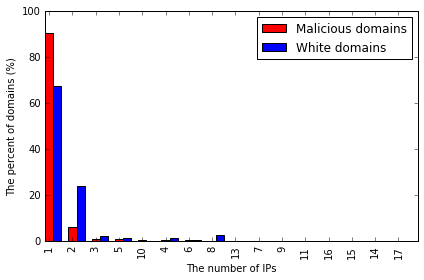

In [30]:
top = 30

## 非法网站的变量内容
mal_y = mal_y[:top]
mal_x = mal_x[:top]
mal_x_ticks = mal_x_ticks[:top]
domain_y = []

for i in mal_x_ticks:
    if ip_ttl_counter[i]:
        domain_y.append(float(ip_ttl_counter[i])/domain_count*100)
    else:
        domain_y.append(0)
    
fig, ax = plt.subplots(figsize=(6, 4))
index = np.arange(top)
bar_width = 0.35

rects1 = ax.bar(mal_x, mal_y, bar_width, color='r', label='Malicious domains')
rects2 = ax.bar(mal_x + bar_width, domain_y, bar_width, color='b', label='White domains')

ax.set_xlabel('The number of IPs')
ax.set_ylabel('The percent of domains (%)')
ax.set_xticks(mal_x + bar_width / 2)
ax.set_xticklabels(mal_x_ticks,rotation=90)
ax.legend()

fig.tight_layout()
plt.show()

**上图说明**  

* 非法和合法域名的IP个数大部分为1个，少部分为2个，其他个数较少，特征基本相同。